دو سیگنال زیر را در نظر بگیرید:  
x₁(t) = e^(−2t) * u(t)  
x₂(t) = sin(2πt) * u(t)  
۱. انرژی هر دو سیگنال را در بازه t ∈ [0, 5] محاسبه کنید.  
۲. کدام سیگنال انرژی بیشتری دارد؟  
۳. نمودار هر دو را رسم کنید.


<ipython-input-5-06797dc4a71c>:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  energy_x1 = np.trapz(x1**2, t)
<ipython-input-5-06797dc4a71c>:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  energy_x2 = np.trapz(x2**2, t)


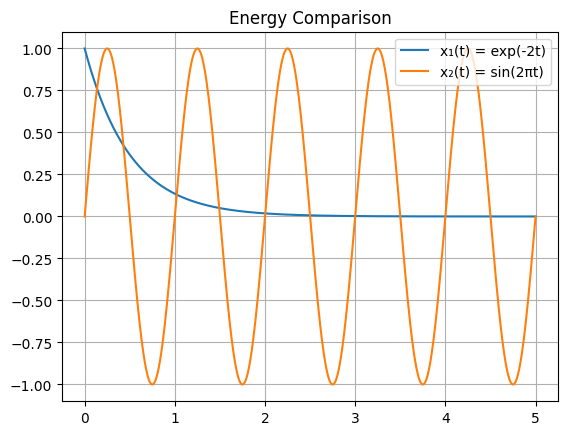

Energy of x₁(t): 0.2500
Energy of x₂(t): 2.5000


In [5]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)
x1 = np.exp(-2 * t)
x2 = np.sin(2 * np.pi * t)

energy_x1 = np.trapz(x1**2, t)
energy_x2 = np.trapz(x2**2, t)

plt.plot(t, x1, label="x₁(t) = exp(-2t)")
plt.plot(t, x2, label="x₂(t) = sin(2πt)")
plt.title("Energy Comparison")
plt.legend()
plt.grid(True)
plt.show()

print(f"Energy of x₁(t): {energy_x1:.4f}")
print(f"Energy of x₂(t): {energy_x2:.4f}")


سیگنال x(t) = e^(−|t|) را در نظر بگیرید.  
سیگنال‌های x(−t) و −x(−t) را رسم کنید.  
نقش تقارن زمانی در سیگنال را بررسی کنید.


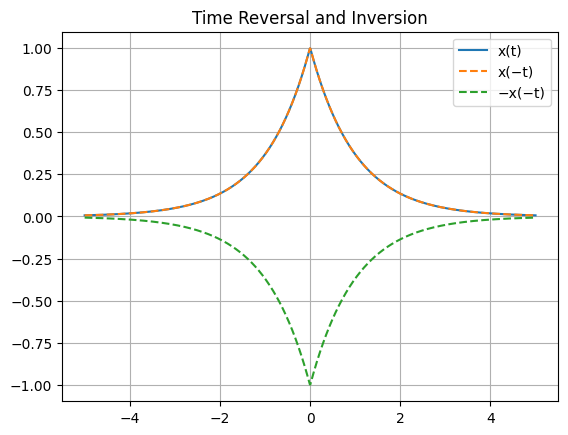

In [2]:
t = np.linspace(-5, 5, 1000)
x = np.exp(-np.abs(t))
x_mirror = np.exp(-np.abs(-t))
x_neg_mirror = -x_mirror

plt.plot(t, x, label="x(t)")
plt.plot(t, x_mirror, '--', label="x(−t)")
plt.plot(t, x_neg_mirror, '--', label="−x(−t)")
plt.title("Time Reversal and Inversion")
plt.legend()
plt.grid(True)
plt.show()


سیستمی با پاسخ ضربه‌ای h(t) = e^(−t) * u(t) را در نظر بگیرید.  
ورودی x(t) = δ(t−2) باشد.  
۱. ابتدا خروجی را بیابید.  
۲. حال اگر ابتدا h(t) را با تاخیر ۲ واحد زمانی جابجا کنیم و سپس کانولوشن انجام دهیم، نتیجه چه تفاوتی دارد؟


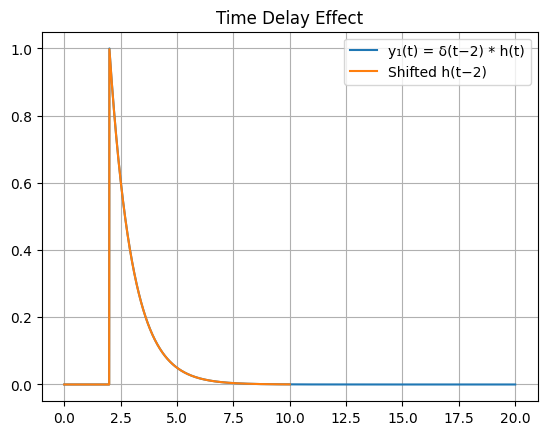

In [6]:
from scipy.signal import convolve

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

x = np.zeros_like(t)
x[np.argmin(np.abs(t - 2))] = 1 / dt

h = np.exp(-t)

y1 = convolve(x, h) * dt
h_delayed = np.exp(-(t - 2)) * (t >= 2)
y2 = convolve(h_delayed, np.zeros_like(t)) * dt  # zero input

t_y = np.linspace(0, 2*t[-1], len(y1))

plt.plot(t_y, y1, label="y₁(t) = δ(t−2) * h(t)")
plt.plot(t, h_delayed, label="Shifted h(t−2)")
plt.legend()
plt.title("Time Delay Effect")
plt.grid(True)
plt.show()


سیگنال x(t) = cos(20t + 5) را در نظر بگیرید.  
۱. فرکانس و فاز اولیه آن را مشخص کنید.  
۲. با استفاده از مشتق فاز نسبت به فرکانس، تأخیر گروهی آن را محاسبه کنید.


In [7]:
# تعریف تابع فاز: φ(ω) = 5
# مشتق φ(ω) نسبت به ω برابر صفر است، پس تأخیر گروهی نیز صفر است.

omega = 20
phase = 5
group_delay = 0  # چون فاز ثابت است

print(f"Frequency (rad/s): {omega}")
print(f"Initial phase: {phase}")
print(f"Group delay: {group_delay}")


Frequency (rad/s): 20
Initial phase: 5
Group delay: 0


سیگنال x(t) = rect(t/τ) با τ = 1 را در نظر بگیرید.  
۱. تبدیل فوریه آن را عددی محاسبه کنید.  
۲. عرض باند فرکانسی آن را بر اساس طیف ترسیمی تخمین بزنید.


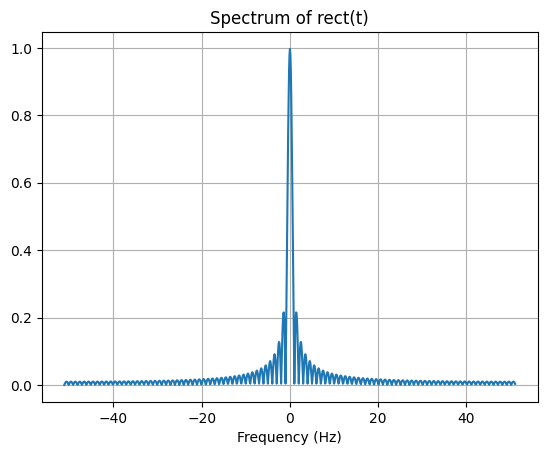

In [8]:
from scipy.fft import fft, fftfreq, fftshift

tau = 1
t = np.linspace(-5, 5, 1024)
x = np.where(np.abs(t) <= tau/2, 1, 0)

dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt

plt.plot(f, np.abs(X))
plt.title("Spectrum of rect(t)")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.show()
